In [1]:
import os
os.chdir('/home/gsalinas/GitHub/nbaaxionns/')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi']= 300

from classes import Particles, NeutronStar
from scripts import (repeat, min_approach,min_approach_sim, grav_en,energy,
                    rm_far, trajs, singletrajs, plot_traj, plot_trajs, nums_vs,
                    G, smoothtraj, torder)

In [2]:
nps = 100_000
rsin = np.array([[6e3, 0., 8e12] for _ in range(1, nps+1)])
vdisp = 1e-5
vsin = repeat(np.array([0., 0., -200.]), nps) + vdisp*np.random.normal(scale=(1., 1., 0.), size=(nps, 3))

ps = Particles(rsin, vsin)

In [3]:
NS = NeutronStar()

In [4]:
grav_en(ps, NS)

/home/gsalinas/GitHub/nbaaxionns/scripts/orbits.py:16: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return ma*NS.grav_pot(p.positions)


array([-0.016589, -0.016589, -0.016589, ..., -0.016589, -0.016589,
       -0.016589])

In [5]:
energy(ps, NS)

array([19999.983411, 19999.983411, 19999.983411, ..., 19999.983411,
       19999.983411, 19999.983411])

In [6]:
min_approach(ps, NS)

/home/gsalinas/GitHub/nbaaxionns/scripts/orbits.py:26: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return -G*NS.mass*ma/(2*energy(p, NS)) + 0.5*np.sqrt((G*NS.mass*ma/energy(p, NS))**2 + 2*ma*mag(p.ang_momentum())**2/energy(p, NS))


array([ 28012.45230799, 111369.8440117 ,   2475.76453243, ...,
        16410.03299846,  53147.27578712,  98294.67002785])

In [7]:
rm_far(ps, NS)

In [8]:
min_approach(ps, NS)

array([13.54589512, 29.20726287, 35.68782309, 21.34256303, 43.69408775,
       24.8759265 , 23.54170344, 13.94217676,  5.77766999,  1.81627941,
       39.31927188, 36.49008108, 17.78109471, 31.65477464, 18.95718466,
       32.46958549, 40.79132272, 44.07439324, 19.38789132,  7.5879465 ,
       44.82349074, 45.17909317, 11.87834641, 33.96694595, 10.00328997,
       35.96877274,  5.07526902, 36.22281858,  5.05089503, 41.20479269,
       38.07278019, 41.67269564, 18.1224949 , 15.57339863, 27.11104325,
       34.53264815,  6.91257769, 20.24469039,  1.43458237, 15.99259799,
       41.25032943, 12.40984697, 27.37638867, 14.81991586, 42.1017761 ,
       15.42948802,  2.27972686, 11.22568072, 21.43063473, 39.23457977,
       13.22512809, 37.84336283, 41.53181668, 12.27298192, 23.20967197,
       13.58619163, 20.53503778,  1.51794576, 16.96566028, 15.11497331,
       11.02985427, 19.99715358,  0.91473691, 28.5884481 , 34.68236169,
        7.44009325, 21.08108505, 35.94936574, 19.35109286, 22.39

In [9]:
len(ps.positions)

90

In [10]:
trajsraw = trajs(ps, NS, rlimits=(NS.radius, NS.rcmax()), rprecision=5e-2)

In [11]:
sgltrajs = list(singletrajs(trajsraw))

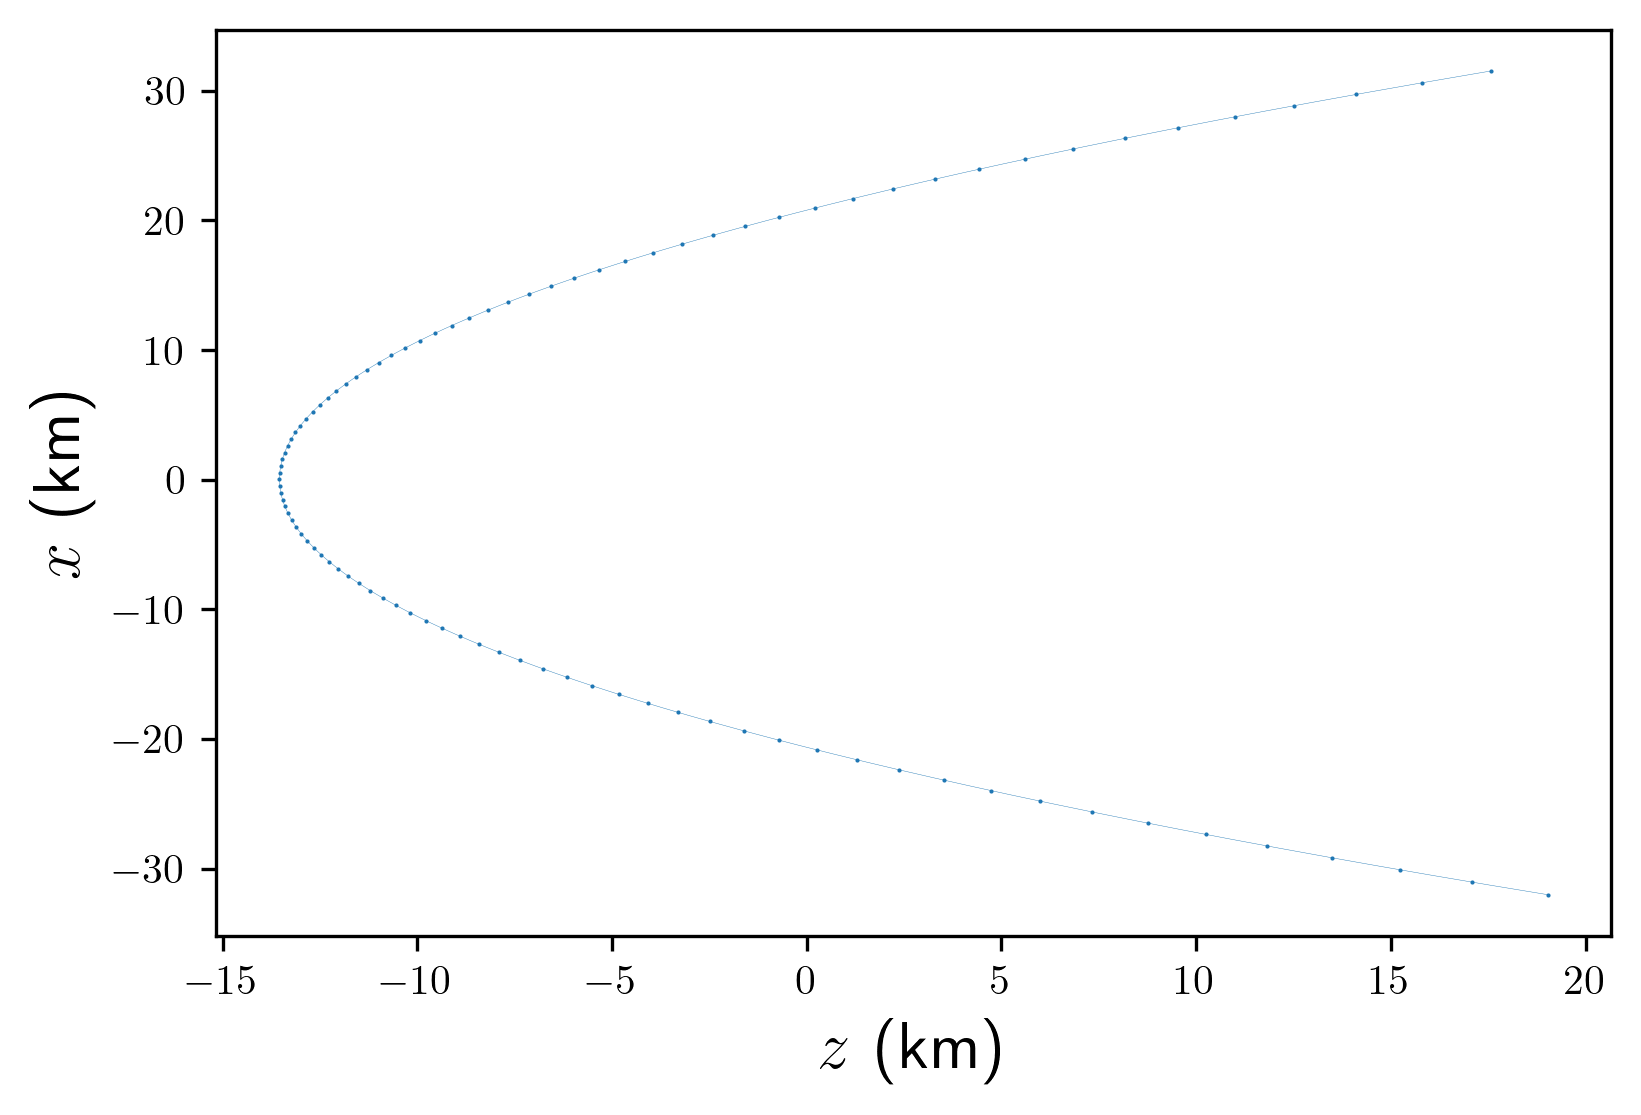

In [14]:
plot_traj(sgltrajs[0], tfix=NS.T)

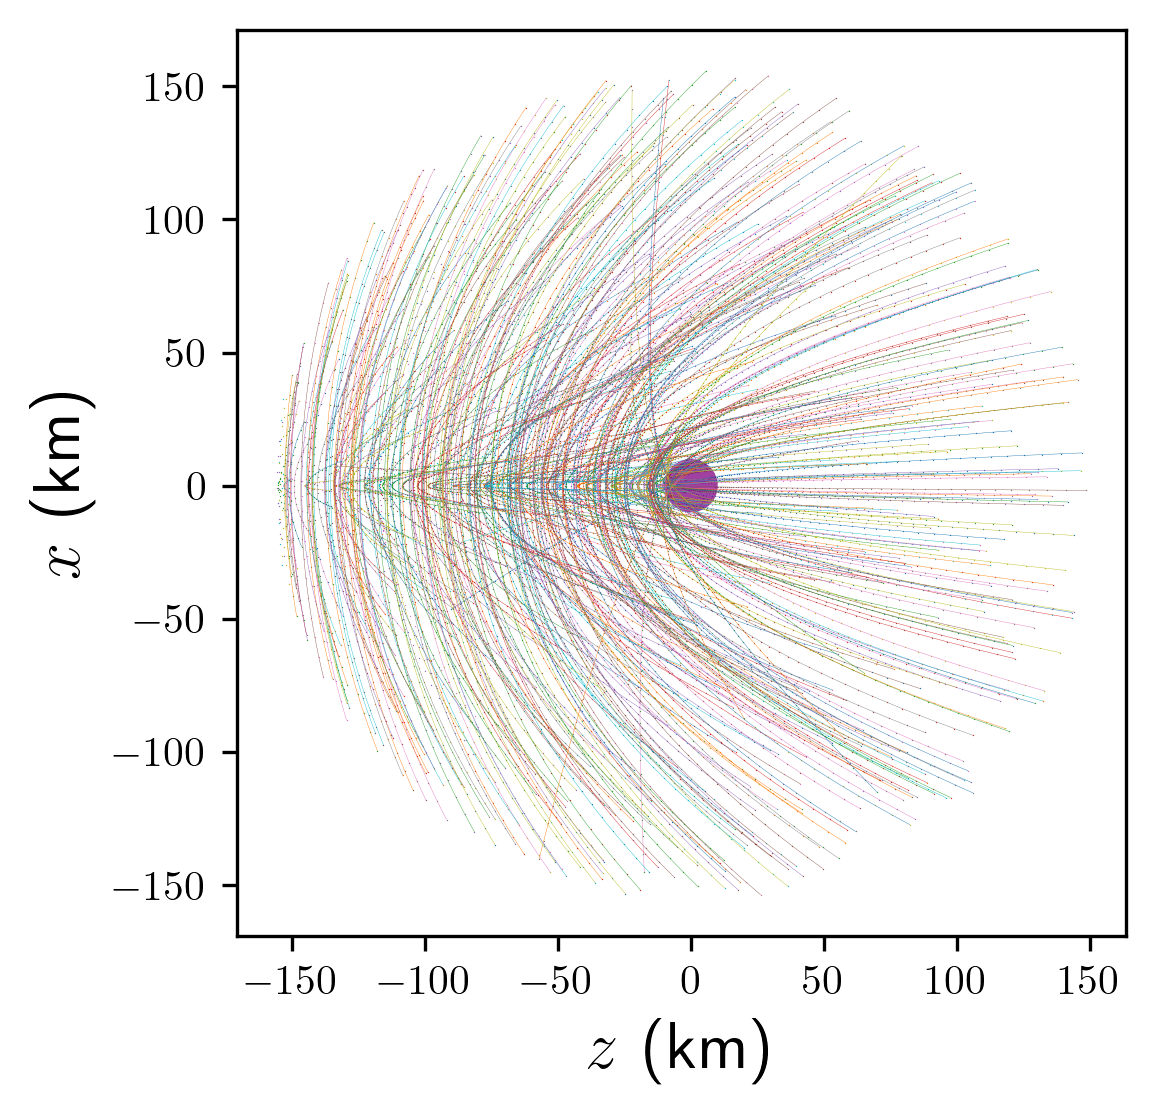

In [ ]:
plot_trajs(sgltrajs, NS, 'jnb/orbits', show=True)

In [ ]:
minsth = min_approach(ps, NS)

In [ ]:
minssim = np.array([min_approach_sim(traj) for traj in sgltrajs])

In [ ]:
ratios = minssim/minsth

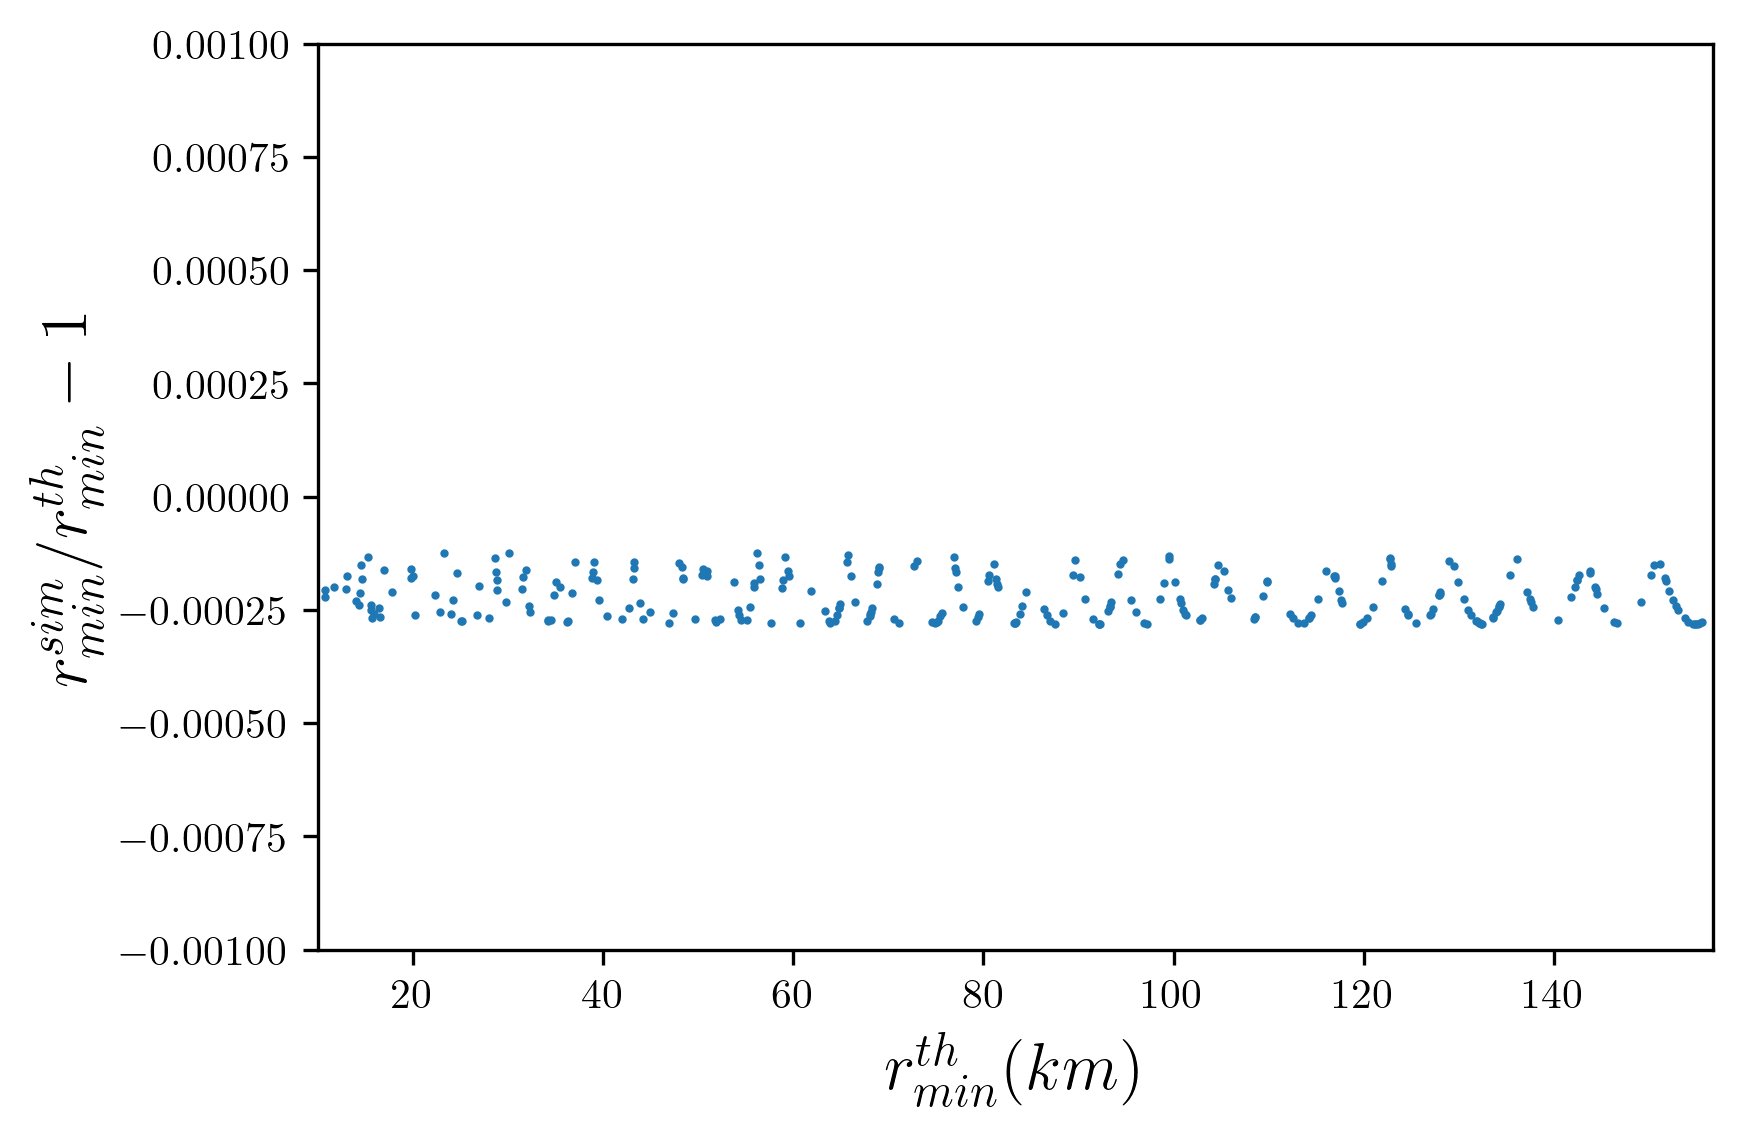

In [ ]:
plt.scatter(minsth, ratios - 1, s=1)
plt.xlabel("$r_{min}^{th} (km)$", fontsize=16)
plt.ylabel("$r_{min}^{sim}/r_{min}^{th} - 1$", fontsize=16)
plt.xlim(NS.radius, NS.rcmax())
plt.ylim(-1e-3,1e-3);